In [1]:
import matplotlib
import math
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import HTML
from scipy.fft import fft, fftfreq, fftshift


# Dyuhh
Ok well even though the plot itself looks like garbage, FFT shows that it's actually fine.

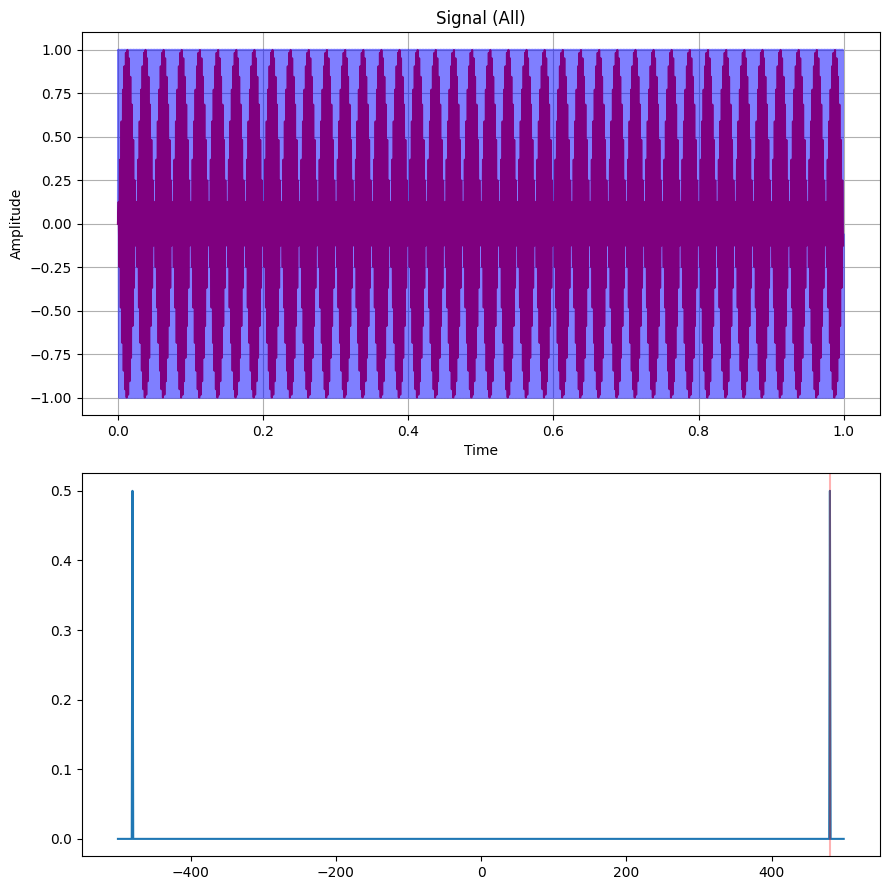

In [2]:
sample_rate = 1000
duration_secs = 1
f = 480

T = np.linspace(0, duration_secs,sample_rate * duration_secs,endpoint=False)
x = 1.0 * np.sin(2*np.pi*T*f)

T_oversample = np.linspace(0, duration_secs,f* 100 * duration_secs,endpoint=False)
x_oversample = 1.0 * np.sin(2*np.pi*T_oversample*f)


# Take the FFT
N = duration_secs * sample_rate
P = 1/sample_rate
yf = fft(x)
xf = fftfreq(N, P)
xf = fftshift(xf)
yplot = fftshift(yf)



# PLOT
fig, (carrier_ax, carrier_slice_ax) = plt.subplots(2, figsize=(9,9))

# Plot carrier signal (All)
carrier_ax.plot(T,x, color="r", label="Signal")
carrier_ax.plot(T_oversample,x_oversample, color="b", label="Signal(Oversampled)", alpha=0.5)

carrier_ax.set_title("Signal (All)")
carrier_ax.set_xlabel("Time")
carrier_ax.set_ylabel("Amplitude")
carrier_ax.grid()
fig.tight_layout()

# Plot carrier signal (Subset)
carrier_slice_ax.plot(xf, 1.0/N * np.abs(yplot))
carrier_slice_ax.axvline(f, color="r", alpha=0.3)

fig.tight_layout()